In [1]:
#|default_exp app

# Aula 02 - FAST.AI: Testando o Modelo Cats

## Dogs x Cats

In [9]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

### Imagem para testar

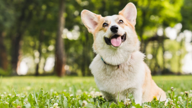

In [16]:
im  = PILImage.create('images/dog.jpg')
im.thumbnail((192,192))
im

### Carregando o modelo

In [10]:
#|export
learn = load_learner('model.pkl')

In [12]:
%time learn.predict(im)

CPU times: total: 141 ms
Wall time: 36 ms


('False', tensor(0), tensor([1.0000e+00, 2.2481e-06]))

In [13]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [14]:
classify_image(im)

{'Dog': 0.9999977350234985, 'Cat': 2.248066493848455e-06}

### Testar página

In [17]:
#|export 
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['images/dog.jpg', 'images/cat.jpg', 'images/dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

C:\Users\keng\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\keng\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
C:\Users\keng\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\keng\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


## Exportando app

In [21]:
import nbdev
nbdev.export.nb_export('Entrega 06 - Parte 3 - Testando o Modelo Criado para Cats.ipynb', './')